# Перевірка `src.visualize` на проміжних результатах

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from src.utils import (
    PATH_PROCESSED, 
    merge_all, 
    weighted_average
)
from src.visualize import (
    FIGURES,
    draw_multiple_spiders,
    draw_profile_gen,
    draw_profile_det,
    draw_boxplot_dist,
    draw_rankings,
    dynamic_rankings
)

In [2]:
dict_weights = {
    'P1':2,
    'P2':2,
    'P3':0.5,
    'P4':1,
    'P5':1,
    'P6':2,
    'P7':1,
    'P8':0.5
}

In [3]:
# таблиця з параметрами за попередній квартал
previous_results = pd.read_csv("https://raw.githubusercontent.com/regional-development/index-2020-2/master/notebooks/00_index_2020-08-13.csv")

In [4]:
# таблиця з параметрами за поточний квартал
data = [pd.read_csv(f) for f in PATH_PROCESSED.rglob("*.csv") if "_raw" not in f.parts[-1]]
df = merge_all(data, on="region")
df.fillna(0, inplace=True)
df = df.loc[df["region"].notnull() & ~df["region"].isin(["м.Київ", 0])].reset_index(drop=True)
cols = df.loc[:, df.columns.str.contains("P")].columns
df["I"] = weighted_average(df, cols, dict_weights)

In [5]:
cols

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'], dtype='object')

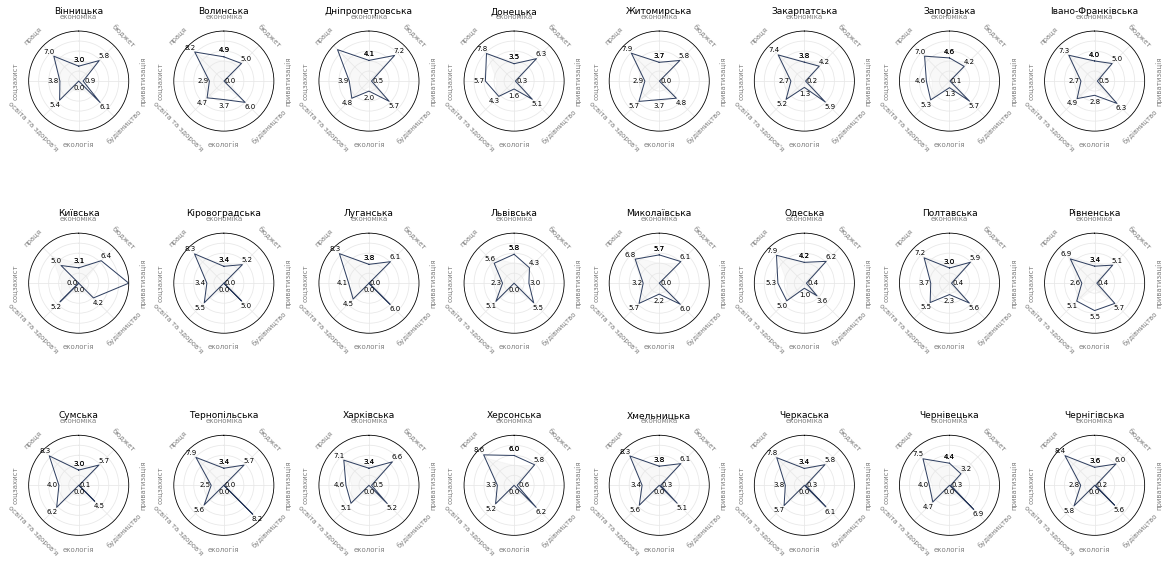

In [6]:
draw_multiple_spiders(df, cols)

c:\github\index-2020-3\src\visualize.py:173: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(x_labels)


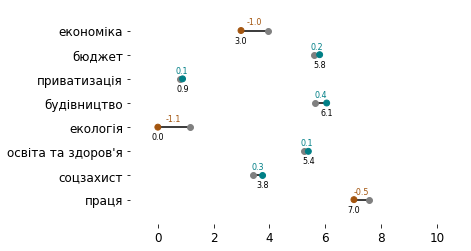

In [7]:
draw_profile_gen(df, cols, 0, save=True)

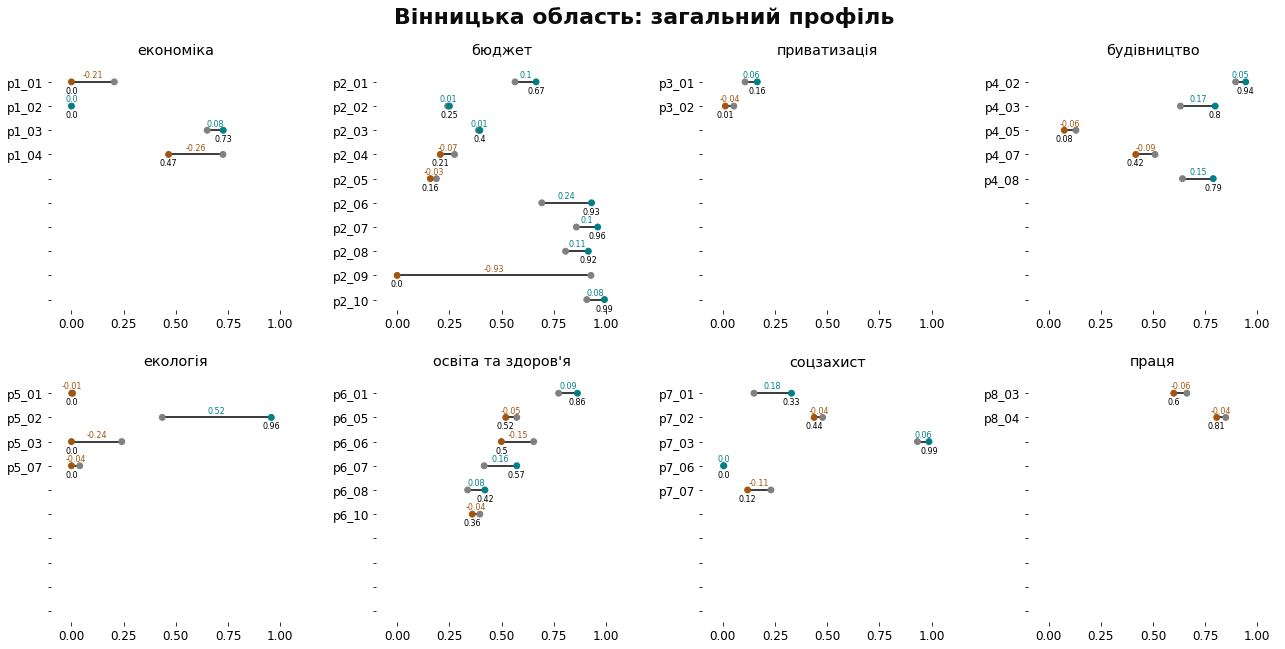

In [8]:
draw_profile_det(df, cols, 0)

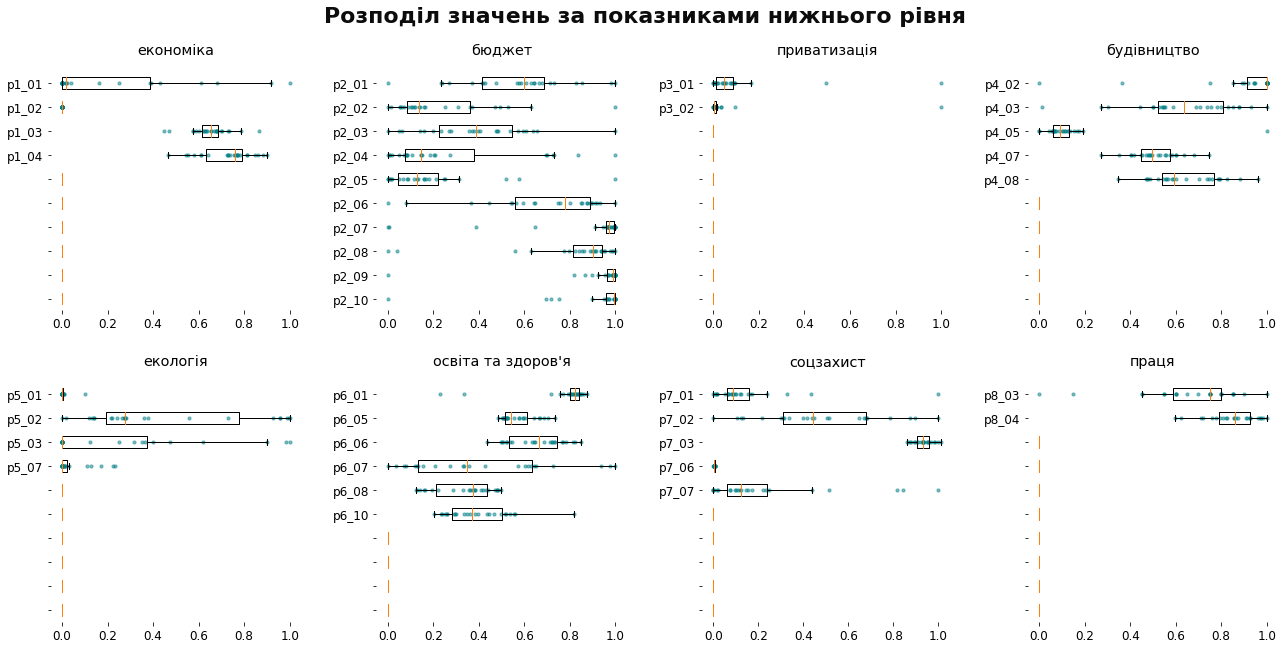

In [9]:
draw_boxplot_dist(df, cols, save=True)

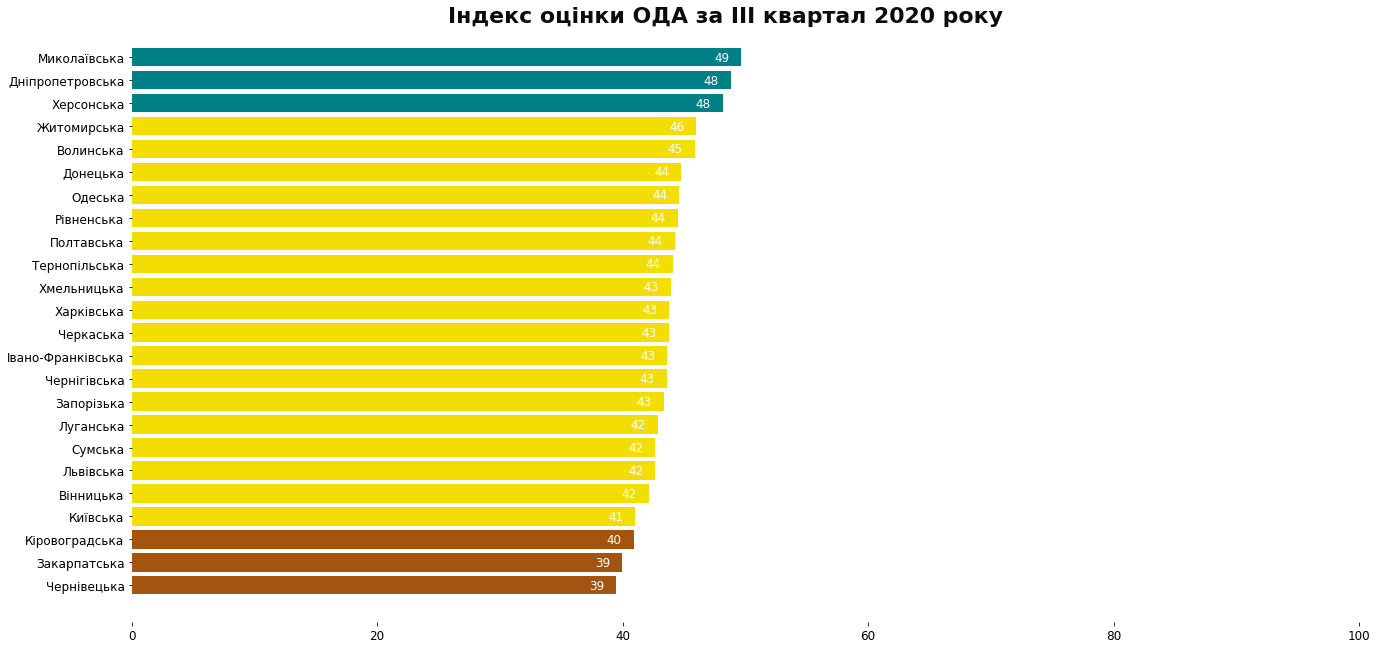

In [10]:
draw_rankings(df)

---

# Тест
## `ranking` + зміна відносно минулого кварталу
## !!! ще не включені усе параметри !!!

In [11]:
index_slice = ["region", "I"]
viz = pd.merge(
    df.loc[:, index_slice],
    previous_results.loc[:, index_slice].rename(columns={"I": "I_previous"}),
    on="region",
    how="left",
)
viz.sort_values("I", inplace=True)

viz["I-1"] = viz["I"] - viz["I_previous"]
colors = ['#a3550f','#f2dd05','#007f86']
viz["col"] = [colors[0] for r in range(3)] + [colors[1] for y in range(viz.shape[0]-6)] + [colors[2] for g in range(3)]
viz["scatter_col"] = np.where(viz["I-1"]<0, "#a3550f", "#007f86")

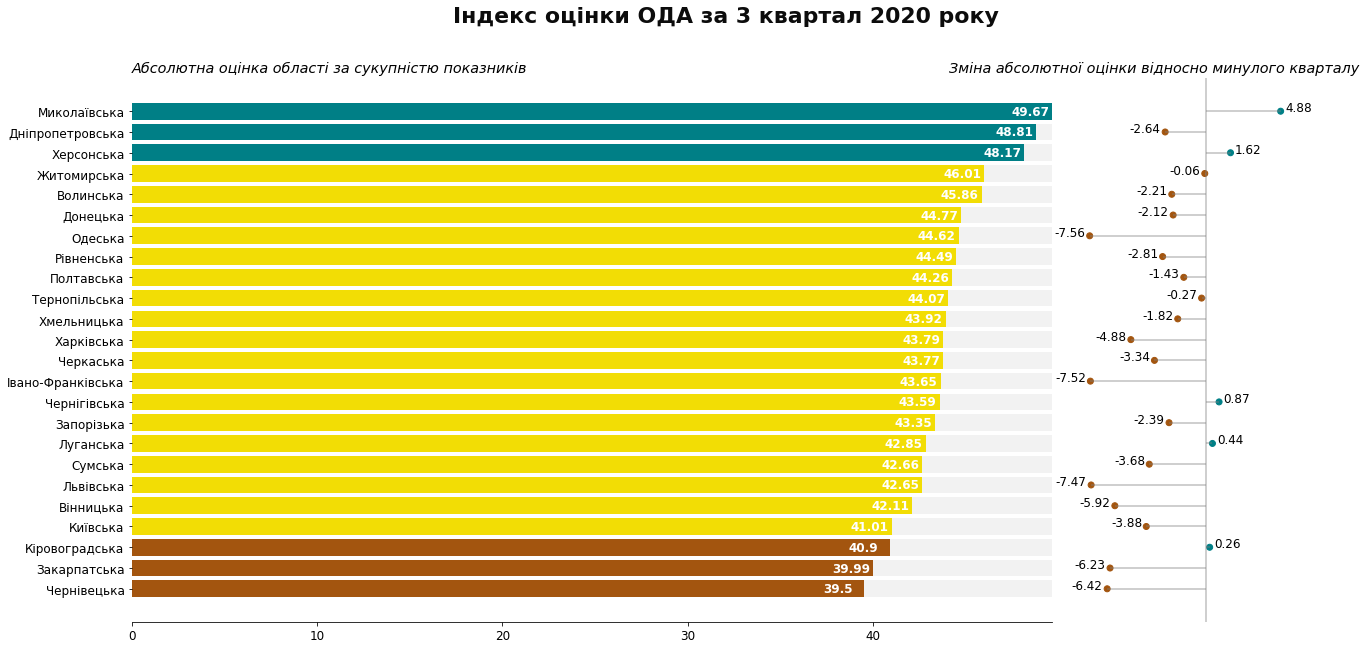

In [12]:
dynamic_rankings(
    df=viz,
    value="I",
    value_colour="col",
    change="I-1",
    change_colour="scatter_col",
    save=True
)